In [3]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [6]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [14]:
text = "파이썬 AI 머신러닝 딥러닝 데이터과학 분석 예측 모델링 토필모델링 텍스트마이닝"

wordcloud = WordCloud(
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf',
    width = 800,
    height = 400,
    background_color = 'white'
).generate(text)

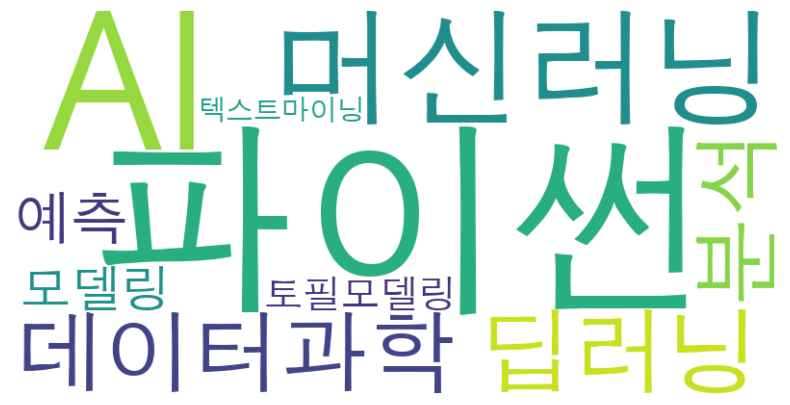

In [15]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
text = "파이썬 AI 머신러닝 딥러닝 데이터과학 분석 예측 모델링 토픽모델링 텍스트마이닝 머신러닝 정말 재미있다"
nouns = word_tokenize(text)
print(nouns)
count = Counter(nouns)
print(count)

['파이썬', 'AI', '머신러닝', '딥러닝', '데이터과학', '분석', '예측', '모델링', '토픽모델링', '텍스트마이닝', '머신러닝', '정말', '재미있다']
Counter({'머신러닝': 2, '파이썬': 1, 'AI': 1, '딥러닝': 1, '데이터과학': 1, '분석': 1, '예측': 1, '모델링': 1, '토픽모델링': 1, '텍스트마이닝': 1, '정말': 1, '재미있다': 1})


In [26]:
top_20 = count.most_common(20)
words_top, counts_top = [], []
for word, cnt in top_20 :
    words_top.append(word)
    counts_top.append(cnt)
    
plt.rcParams['font.family'] = 'AppleGothic'

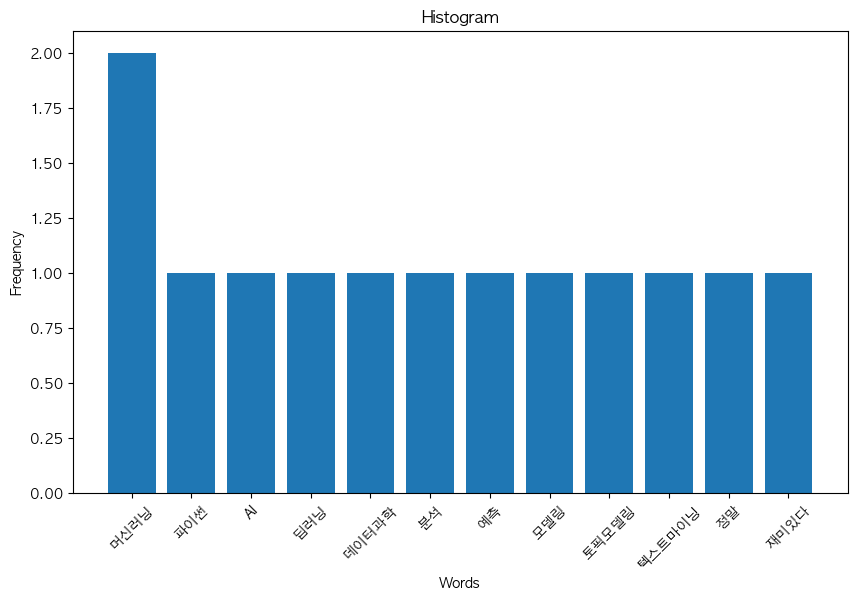

In [27]:
plt.figure(figsize=(10,6))
plt.bar(words_top, counts_top)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.xticks(rotation=45)
plt.show()

# 예제

In [47]:
# 아래 기사에 접근하여 스크롤을 3번 내린 후,
# 검색된 기사에서 요약기사의 내용을 수집하여 DataFrame 형태로 저장
# 형태소 분석 (Okt) 사용하여 수집된 요약기사 내용들의 WordCloud를 그리기
# 단어들의 빈도 그래프를 히스토그램으로 표현

from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

driver = webdriver.Chrome()

# url 접근
url_CNN = 'https://edition.cnn.com/search?q=trump&from=0&size=10&page=1&sort=newest&types=all&section='
driver.get(url_CNN)
time.sleep(2)

# 스크롤 3번 내리기
for i in range(3) :
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(1)

# 요약기사 내용 수집
news_list = []
headline = driver.find_elements(By.CSS_SELECTOR, ".container__headline-text")
description = driver.find_elements(By.CSS_SELECTOR, ".container__description")
for i in range(len(headline)) :
    news_list.append({
        "Title" : headline[i].text.strip(),
        "Summary" : description[i].text.strip()
    })

driver.quit()

# df 저장
news_df = pd.DataFrame(news_list)
news_df

,Title,Summary
0,Trump’s day of tariff mayhem contains a scary ...,There is no plan.
1,Key takeaways from CNN’s town hall with Sen. B...,Sen. Bernie Sanders delivered a wholesale reje...
2,Bernie Sanders' warning to Americans about Mus...,In a CNN town hall moderated by Anderson Coope...
3,3-time Trump voter has now lost 50% of his bus...,North Carolina beekeeper Jim Hartman voted for...
4,CA port director: Trump's tariffs leave worker...,Gene Seroka joins The Lead
5,Trump wants to play market hero. But the econo...,“I guess they say it was the biggest day in fi...
6,Inside Trump’s tariff retreat: How fears of a ...,President Donald Trump’s abrupt decision to re...
7,Former Trump official describes how she thinks...,Former Trump White House communications direct...
8,These tech leaders donated to Trump. Now they’...,Silicon Valley leaders donated to President Do...
9,"Trump targets two first term critics, a law fi...",President Donald Trump said on Wednesday that ...


In [48]:
# 형태소 분석
from nltk.tokenize import word_tokenize

all_text = " ".join(news_df["Title"].tolist())
nouns = word_tokenize(all_text)

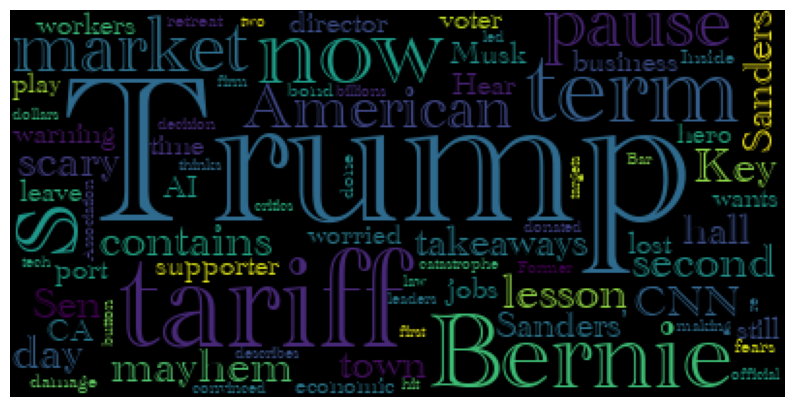

In [57]:
# wordcloud 그리기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    font_path='/System/Library/Fonts/Supplemental/Academy Engraved LET Fonts.ttf',
    background_color="black"
).generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

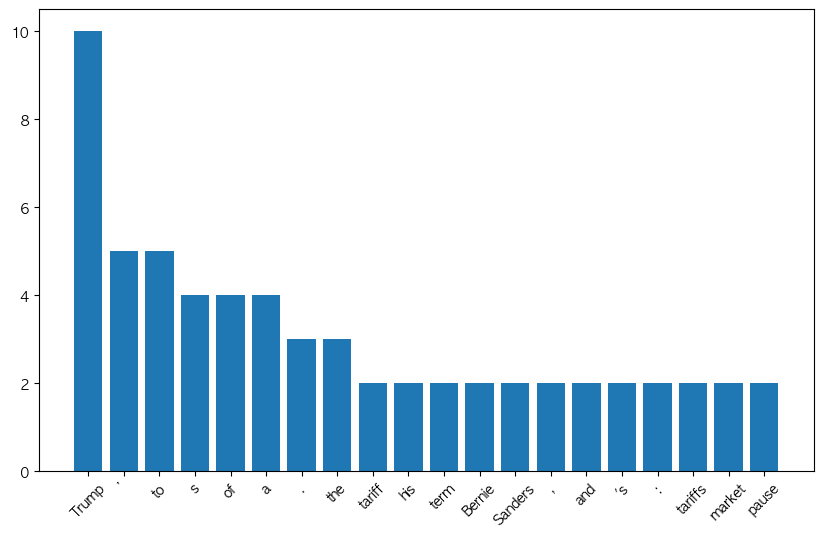

In [58]:
# 빈도 히스토그램으로 표현
from collections import Counter

count = Counter(nouns)
top_20 = count.most_common(20)
words_top, counts_top = [], []
for word, cnt in top_20 :
    words_top.append(word)
    counts_top.append(cnt)
    
plt.figure(figsize=(10,6))
plt.bar(words_top, counts_top)
plt.xticks(rotation=45)
plt.show()